In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import pyodbc
from datetime import datetime
from sqlalchemy import create_engine, exc
from dotenv import load_dotenv

In [151]:
investment = 'QQQ'
index = 'NASDAQ'

In [152]:
# Define the connection string for Windows Authentication
server = 'MoemenLaptop'
database = 'InvestmentPortfolio'
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'


# Establish the connection
conn = pyodbc.connect(connection_string)

# Write your query
query = f"""SELECT a.date, a.Symbol as Stock, b.Symbol as [Index], a.[Close] as stock_close, b.[close] as index_close
            FROM Monthly_Data AS a
            JOIN Index_Monthly AS b ON a.date = b.date
            WHERE a.Symbol = '{investment}'""" 

# Use pandas to read the SQL query into a DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
df


C:\Users\moeme\AppData\Local\Temp\ipykernel_49448\166263176.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,date,Stock,Index,stock_close,index_close
0,2023-02-01,QQQ,NASDAQ,293.56,12042.12
1,2023-03-01,QQQ,NASDAQ,320.93,13181.35
2,2023-04-01,QQQ,NASDAQ,322.56,13245.99
3,2023-05-01,QQQ,NASDAQ,347.99,14254.09
4,2023-06-01,QQQ,NASDAQ,369.42,15179.21
5,2023-07-01,QQQ,NASDAQ,383.68,15757.00
6,2023-08-01,QQQ,NASDAQ,377.99,15501.07
7,2023-09-01,QQQ,NASDAQ,358.27,14715.24
8,2023-10-01,QQQ,NASDAQ,350.87,14409.78
9,2023-11-01,QQQ,NASDAQ,388.83,15947.87


In [153]:
# plot two columns using Seaborn
df[investment] = df['stock_close'] / df['stock_close'].iloc[0] #* 100
df[index] = df['index_close'] / df['index_close'].iloc[0] #* 100
#plt.figure(figsize=(12, 6))
#sns.lineplot(data=df[['stock_close_norm', 'index_close_norm']])
#plt.show()

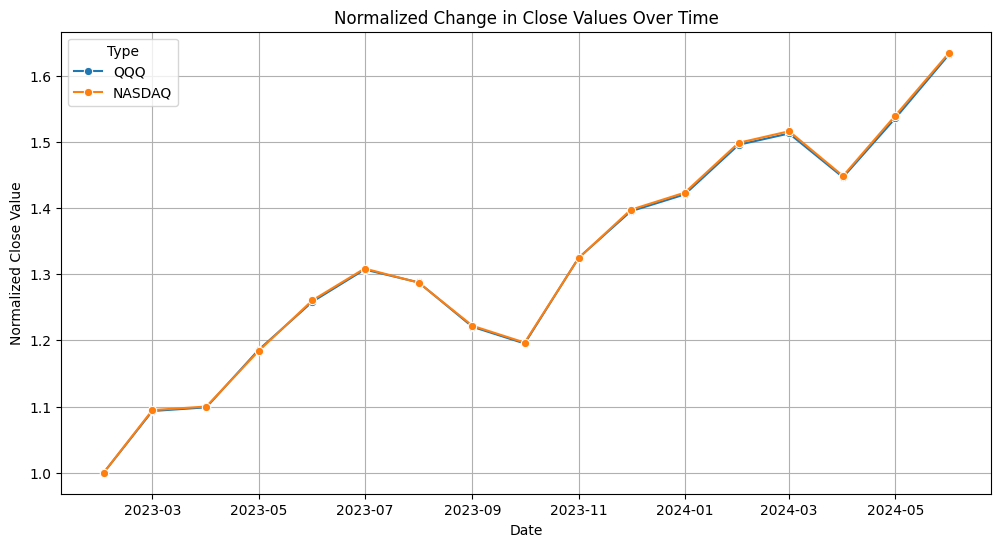

In [154]:
# Melt the DataFrame to long format
df_melted = df.melt(id_vars=['date'], value_vars=[investment, index], var_name='Type', value_name='Normalized Value')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='date', y='Normalized Value', hue='Type', marker='o')

# Customize the plot
plt.title('Normalized Change in Close Values Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Close Value')
plt.grid(True)

plt.legend(title='Type')

# Show the plot
plt.show()


# NASDAQ VS Economic indicators


C:\Users\moeme\AppData\Local\Temp\ipykernel_49448\2315334998.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query, conn)


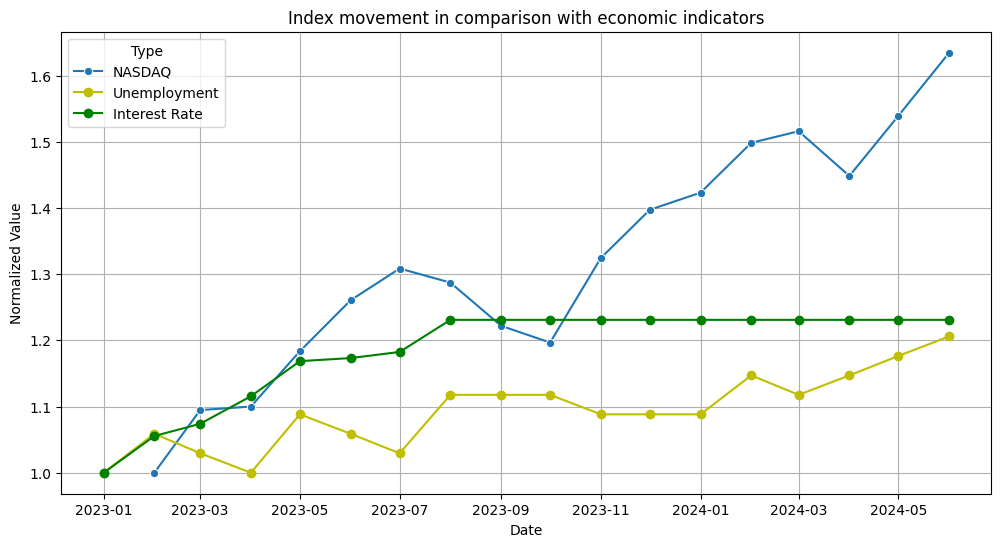

In [155]:
# Melt the DataFrame to long format
df_melted = df.melt(id_vars=['date'], value_vars=[index], var_name='Type', value_name='Normalized Value')


# Establish the connection
conn = pyodbc.connect(connection_string)

# Write your query
query = f"""SELECT * FROM Eco_indicators""" 

# Use pandas to read the SQL query into a DataFrame
df2 = pd.read_sql(query, conn)

# Close the connection
conn.close()


df2['unemp'] = df2['unemployment'] / df2['unemployment'].iloc[0]
df2['inter'] = df2['interest_rate'] / df2['interest_rate'].iloc[0]

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='date', y='Normalized Value', hue='Type', marker='o')

##########################################

# Plot lines for unemployment and interest_rate from df
plt.plot(df2['date'], df2['unemp'], marker='o', label='Unemployment', linestyle='-', color='y')
plt.plot(df2['date'], df2['inter'], marker='o', label='Interest Rate', linestyle='-', color='g')


##########################################

# Customize the plot
plt.title('Index movement in comparison with economic indicators')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.grid(True)

plt.legend(title='Type')

# Show the plot
plt.show()

# 10 SMA VS 100 SMA


In [156]:
# Establish the connection
conn = pyodbc.connect(connection_string)

# Write your query
query3 = f"""WITH X AS (
		SELECT a.[Date], b.Symbol, a.value as SMA_10, b.value as SMA_100
	FROM SMA_10_Day AS a
		JOIN SMA_100_Day as b 
		 ON a.[date] = b.[date] AND a.Symbol = b.Symbol
	Where a.Symbol = '{investment}'
),
Y AS(SELECT a.[Date], b.Symbol as indx_Symbol, a.value as nas_SMA_10, b.value as nas_SMA_100
	FROM SMA_10_Day AS a
		JOIN SMA_100_Day as b 
		 ON a.[date] = b.[date] AND a.Symbol = b.Symbol
	Where a.Symbol = 'NASDAQ')

SELECT * 
FROM X JOIN Y ON X.Date = Y.Date;""" 

# Use pandas to read the SQL query into a DataFrame
df5 = pd.read_sql(query3, conn)


# Close the connection
conn.close()

C:\Users\moeme\AppData\Local\Temp\ipykernel_49448\4085946063.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query3, conn)


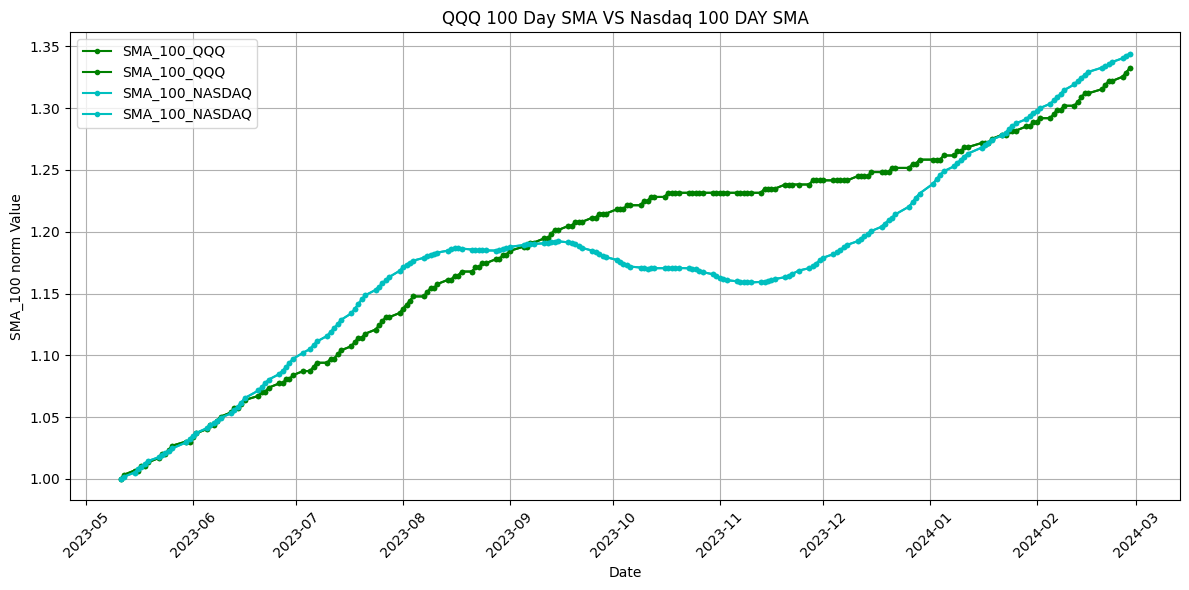

In [157]:
plt.figure(figsize=(12, 6))

# Normalize before plotting
df5['norm_100'] = df5['SMA_100'] / df5['SMA_100'].iloc[0]
df5['nas_norm_100'] = df5['nas_SMA_100'] / df5['nas_SMA_100'].iloc[0]

# Plot with unique labels
plt.plot(df5['Date'], df5['norm_100'], marker='.', color='g', label=f'SMA_100_{investment}')
plt.plot(df5['Date'], df5['nas_norm_100'], marker='.', color='c', label='SMA_100_NASDAQ')

# Customize the plot
plt.title(f'{investment} 100 Day SMA VS Nasdaq 100 DAY SMA')
plt.xlabel('Date')
plt.ylabel('SMA_100 norm Value')
plt.grid(True)

# Ensure unique legend labels
plt.gca().legend([])
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


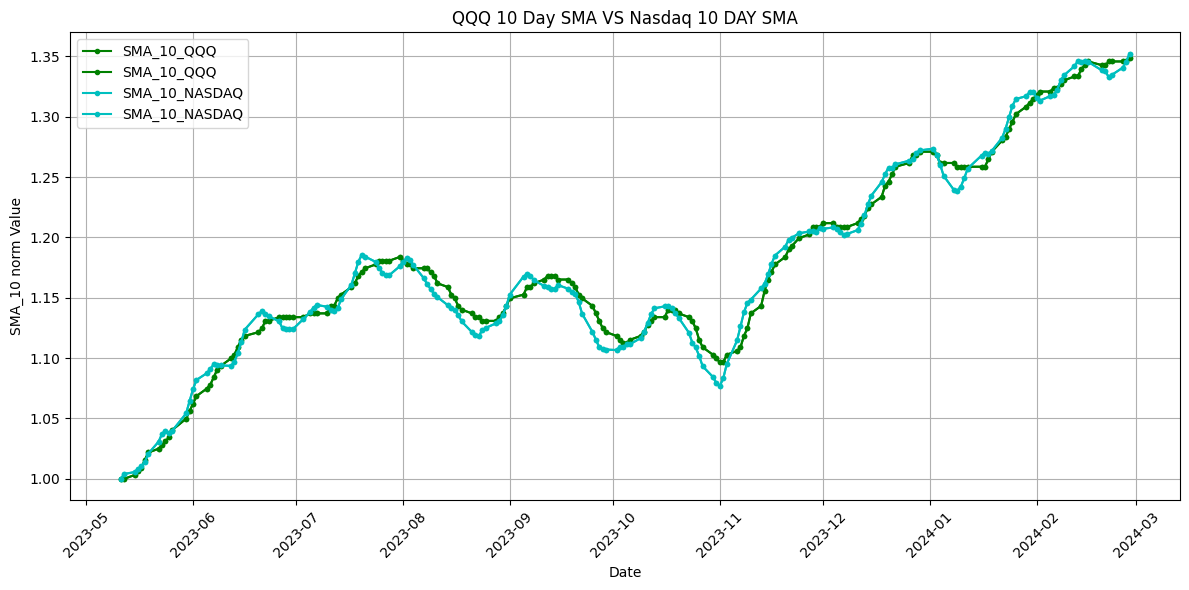

In [158]:
plt.figure(figsize=(12, 6))

# Normalize b4 plotting
df5['norm_10'] = df5['SMA_10'] / df5['SMA_10'].iloc[0]
df5['nas_norm_10'] = df5['nas_SMA_10'] / df5['nas_SMA_10'].iloc[0]


plt.plot(df5['Date'], df5['norm_10'], marker='.', color='g', label=f'SMA_10_{investment}')
plt.plot(df5['Date'], df5['nas_norm_10'], marker='.', color='c', label='SMA_10_NASDAQ')

# Customize the plot
plt.title(f'{investment} 10 Day SMA VS Nasdaq 10 DAY SMA')
plt.xlabel('Date')
plt.ylabel('SMA_10 norm Value')
plt.grid(True)
plt.legend()


# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()